In [5]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import numpy as np
from scipy import stats

In [6]:
datos = pd.read_csv("practico4.csv")

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fecha                       1005 non-null   object 
 1   Dirección IP                1005 non-null   object 
 2   Actividad (en hs)           1005 non-null   float64
 3   Acceso a Facebook (en hs)   1000 non-null   float64
 4   Acceso a Instagram (en hs)  990 non-null    float64
 5   Acceso a Twitch (en hs)     999 non-null    float64
 6   Acceso a TikTok (en hs)     950 non-null    float64
dtypes: float64(5), object(2)
memory usage: 55.1+ KB


<AxesSubplot: >

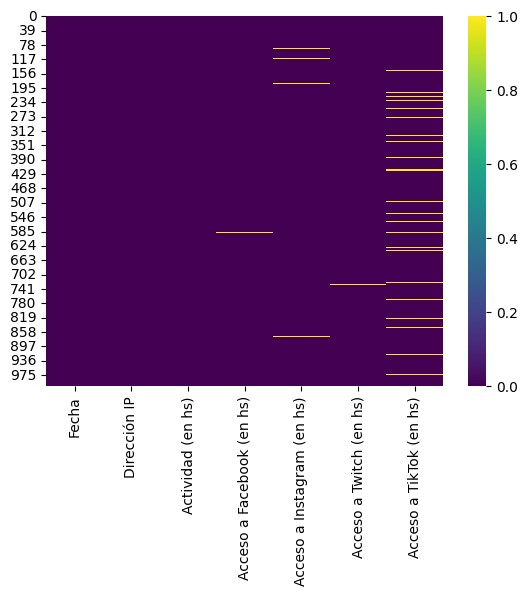

In [8]:
sns.heatmap(datos.isnull(), cmap='viridis')

In [9]:
datos.describe()

,Actividad (en hs),Acceso a Facebook (en hs),Acceso a Instagram (en hs),Acceso a Twitch (en hs),Acceso a TikTok (en hs)
count,1005.000000,1000.000000,990.000000,999.000000,950.000000
mean,9.579622,3.707200,5.946747,5.158248,4.189189
std,5.721012,2.898833,3.962645,3.840922,2.815012
min,-2.060000,0.570000,0.450000,0.010000,0.060000
25%,4.810000,2.027500,2.100000,2.010000,2.162500
50%,8.030000,2.860000,6.385000,3.660000,3.605000
75%,14.000000,5.032500,9.377500,8.085000,5.147500
max,34.450000,37.060000,22.960000,23.680000,19.230000


In [10]:
columnas = list(datos.columns)

In [11]:
columnas

['Fecha',
 'Dirección IP',
 'Actividad (en hs)',
 'Acceso a Facebook (en hs)',
 'Acceso a Instagram (en hs)',
 'Acceso a Twitch (en hs)',
 'Acceso a TikTok (en hs)']

In [12]:
del(columnas[0:2])

In [13]:
def verificacion_de_medias(lista):
    test = {}
    for columna in lista:
        w, p = stats.shapiro(datos[columna].dropna())
        test[columna] = p
    return test

In [14]:
verificacion_de_medias(columnas)

{'Actividad (en hs)': 6.710936342923174e-20,
 'Acceso a Facebook (en hs)': 5.885453550164232e-44,
 'Acceso a Instagram (en hs)': 6.455675188313227e-27,
 'Acceso a Twitch (en hs)': 8.659905969376384e-25,
 'Acceso a TikTok (en hs)': 2.721622484232854e-29}

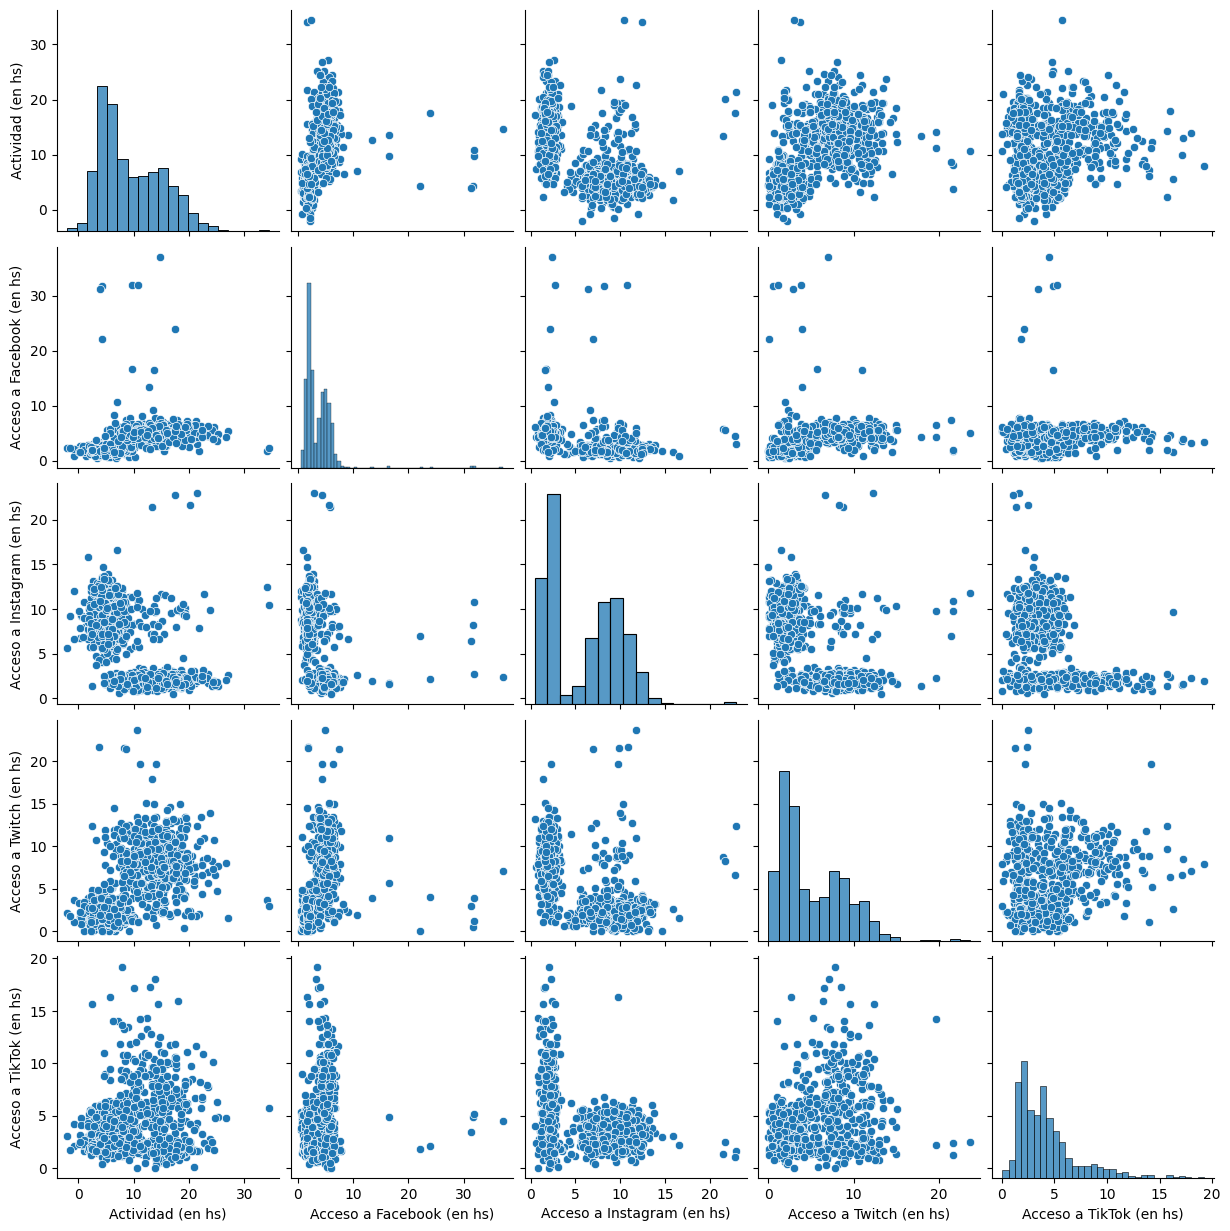

In [15]:
sns.pairplot(datos)

In [16]:
datos.quantile(0.05).to_dict()

/var/folders/6c/jx1384051znf830chty2hqj80000gn/T/ipykernel_21745/2204454858.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos.quantile(0.05).to_dict()


{'Actividad (en hs)': 2.68,
 'Acceso a Facebook (en hs)': 1.38,
 'Acceso a Instagram (en hs)': 1.4244999999999999,
 'Acceso a Twitch (en hs)': 0.83,
 'Acceso a TikTok (en hs)': 1.41}

In [17]:
Cs1 = datos["Actividad (en hs)"].quantile(0.95)
Ci1 = datos["Actividad (en hs)"].quantile(0.05)
Cs2 = datos["Acceso a Instagram (en hs)"].quantile(0.95)
Ci2 = datos["Acceso a Instagram (en hs)"].quantile(0.05)

datos1 = datos[(datos["Actividad (en hs)"] >= Ci1) & (datos["Actividad (en hs)"] <= Cs1) & (datos["Acceso a Instagram (en hs)"] >= Ci2) & (datos["Acceso a Instagram (en hs)"] <= Cs2)].reset_index(drop=True)

In [18]:
datos1

,Fecha,Dirección IP,Actividad (en hs),Acceso a Facebook (en hs),Acceso a Instagram (en hs),Acceso a Twitch (en hs),Acceso a TikTok (en hs)
0,16/09/20,242.99.117.120,3.36,0.57,8.81,1.95,3.69
1,06/05/20,181174223110,4.28,2.91,9.66,3.45,4.06
2,01/10/21,58.54.184.167,5.62,2.60,6.95,1.94,4.77
3,01/03/17,135.79.184.226,5.83,2.15,7.82,2.03,4.19
4,01/02/21,248.230.40.6,4.59,1.79,11.67,1.46,5.39
...,...,...,...,...,...,...,...
796,02/04/20,93.205.225.51,5.68,1.95,1.76,10.00,8.40
797,07/02/19,43.55.114.100,4.62,2.05,2.53,5.55,10.96
798,25/01/20,147.210.83.222,6.21,1.98,1.58,8.84,14.01
799,03/07/17,117.69.141.168,4.69,2.41,1.70,9.35,8.83


In [19]:
datos2 = datos1.dropna().reset_index(drop=True)

In [20]:
datos3 = datos2.drop_duplicates().reset_index(drop=True)

In [21]:
datos3

,Fecha,Dirección IP,Actividad (en hs),Acceso a Facebook (en hs),Acceso a Instagram (en hs),Acceso a Twitch (en hs),Acceso a TikTok (en hs)
0,16/09/20,242.99.117.120,3.36,0.57,8.81,1.95,3.69
1,06/05/20,181174223110,4.28,2.91,9.66,3.45,4.06
2,01/10/21,58.54.184.167,5.62,2.60,6.95,1.94,4.77
3,01/03/17,135.79.184.226,5.83,2.15,7.82,2.03,4.19
4,01/02/21,248.230.40.6,4.59,1.79,11.67,1.46,5.39
...,...,...,...,...,...,...,...
742,02/04/20,93.205.225.51,5.68,1.95,1.76,10.00,8.40
743,07/02/19,43.55.114.100,4.62,2.05,2.53,5.55,10.96
744,25/01/20,147.210.83.222,6.21,1.98,1.58,8.84,14.01
745,03/07/17,117.69.141.168,4.69,2.41,1.70,9.35,8.83


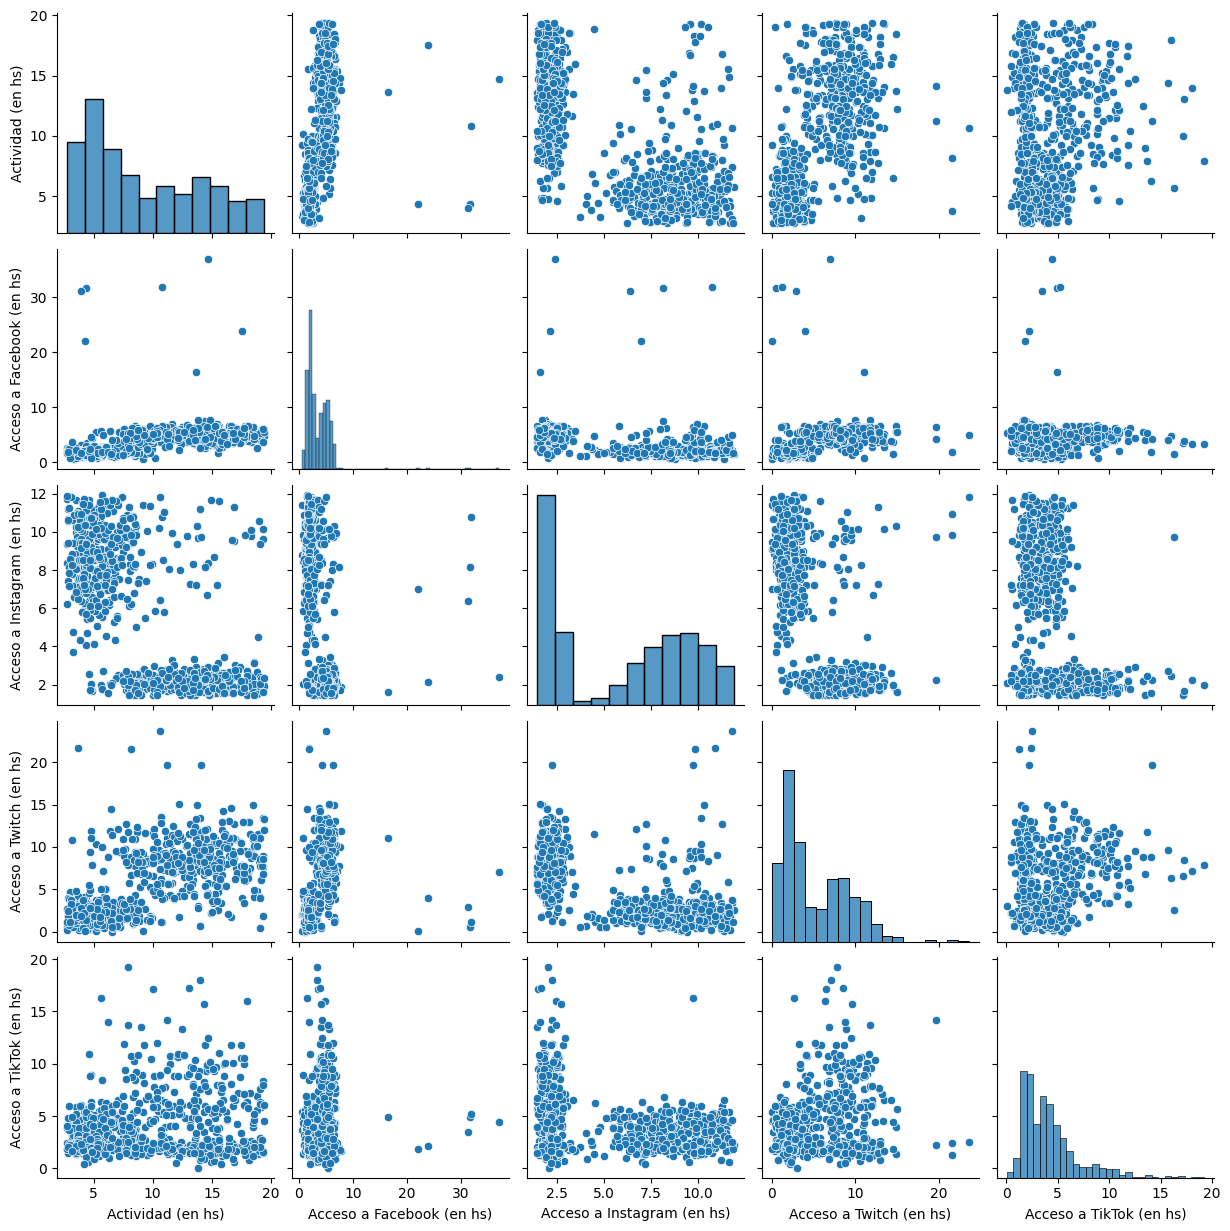

In [22]:
sns.pairplot(datos3)

In [23]:
scaler = StandardScaler()
datos_escaleado = scaler.fit_transform(datos3[columnas])

In [24]:
def inercias_por_k(df_escalado):
    inercias = {}
    for i in range(1,11):
        kmeans = KMeans(n_clusters = i, init="random", n_init=10, max_iter=300, random_state=123457)
        kmeans.fit(df_escalado)
        inercias[i] = kmeans.inertia_
    return inercias

In [25]:
inercias = inercias_por_k(datos_escaleado)

In [26]:
inercias

{1: 3734.9999999999995,
 2: 1977.004106789514,
 3: 1532.9011165182087,
 4: 1104.3758185341808,
 5: 970.2028479198827,
 6: 877.9949523741495,
 7: 812.4296627071066,
 8: 748.2677716691137,
 9: 706.0896383740226,
 10: 660.3104422070318}

In [27]:
df_inercias = pd.DataFrame(inercias.items(), columns=["K", "inercia"])

<AxesSubplot: xlabel='K', ylabel='inercia'>

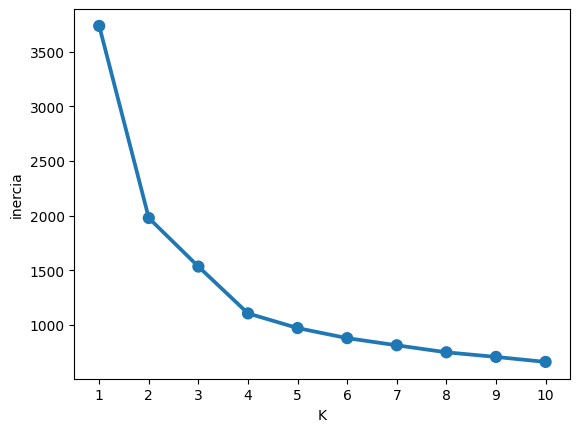

In [28]:
sns.pointplot(data = df_inercias, x = "K", y = "inercia")

In [29]:
k = 2
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457)
kmeans.fit(datos_escaleado)

KMeans(init='random', n_clusters=2, random_state=123457)

<AxesSubplot: >

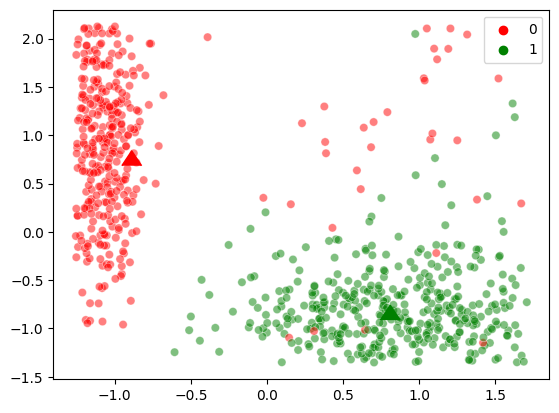

In [30]:
colores = ["red", "green"]
sns.scatterplot(x = datos_escaleado[:, 2], y = datos_escaleado[:, 0], hue = kmeans.labels_, palette = colores, alpha = 0.5)
sns.scatterplot(x = kmeans.cluster_centers_[:, 2], y = kmeans.cluster_centers_[:, 0], zorder = 10, palette = colores, hue = [0, 1], legend = False, marker=6, s=200)

In [31]:
silhouette_avg = silhouette_score(datos_escaleado, kmeans.labels_)
sample_silhouette_values = silhouette_samples(datos_escaleado, kmeans.labels_)

In [32]:
def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([]) 

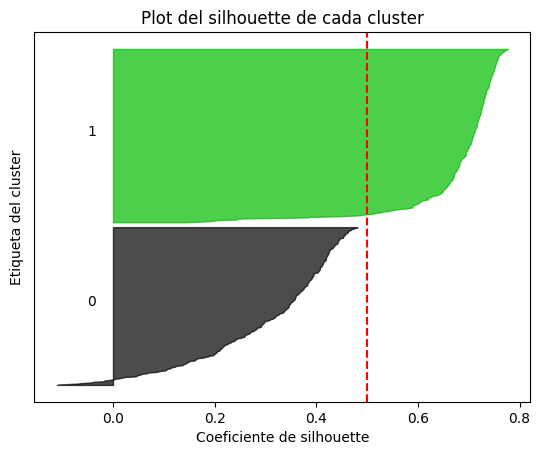

In [33]:
graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)